In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.simplefilter('ignore', FutureWarning)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score 

ufc_stats = pd.read_csv('/Users/NikhilSharma/Downloads/ufc-fighters-statistics.csv')
ufc_stats.head()

ufc_stats = ufc_stats.dropna()
ufc_featherweights = ufc_stats.loc[(ufc_stats['weight_in_kg'] <= 65.9) & (ufc_stats['weight_in_kg'] > 64)]
ufc_featherweights 

epsilon = 0.9

ufc_featherweights.loc[ufc_featherweights['losses']==0, 'losses'] = epsilon

win_loss_ratio = ufc_featherweights['wins']/ufc_featherweights['losses']


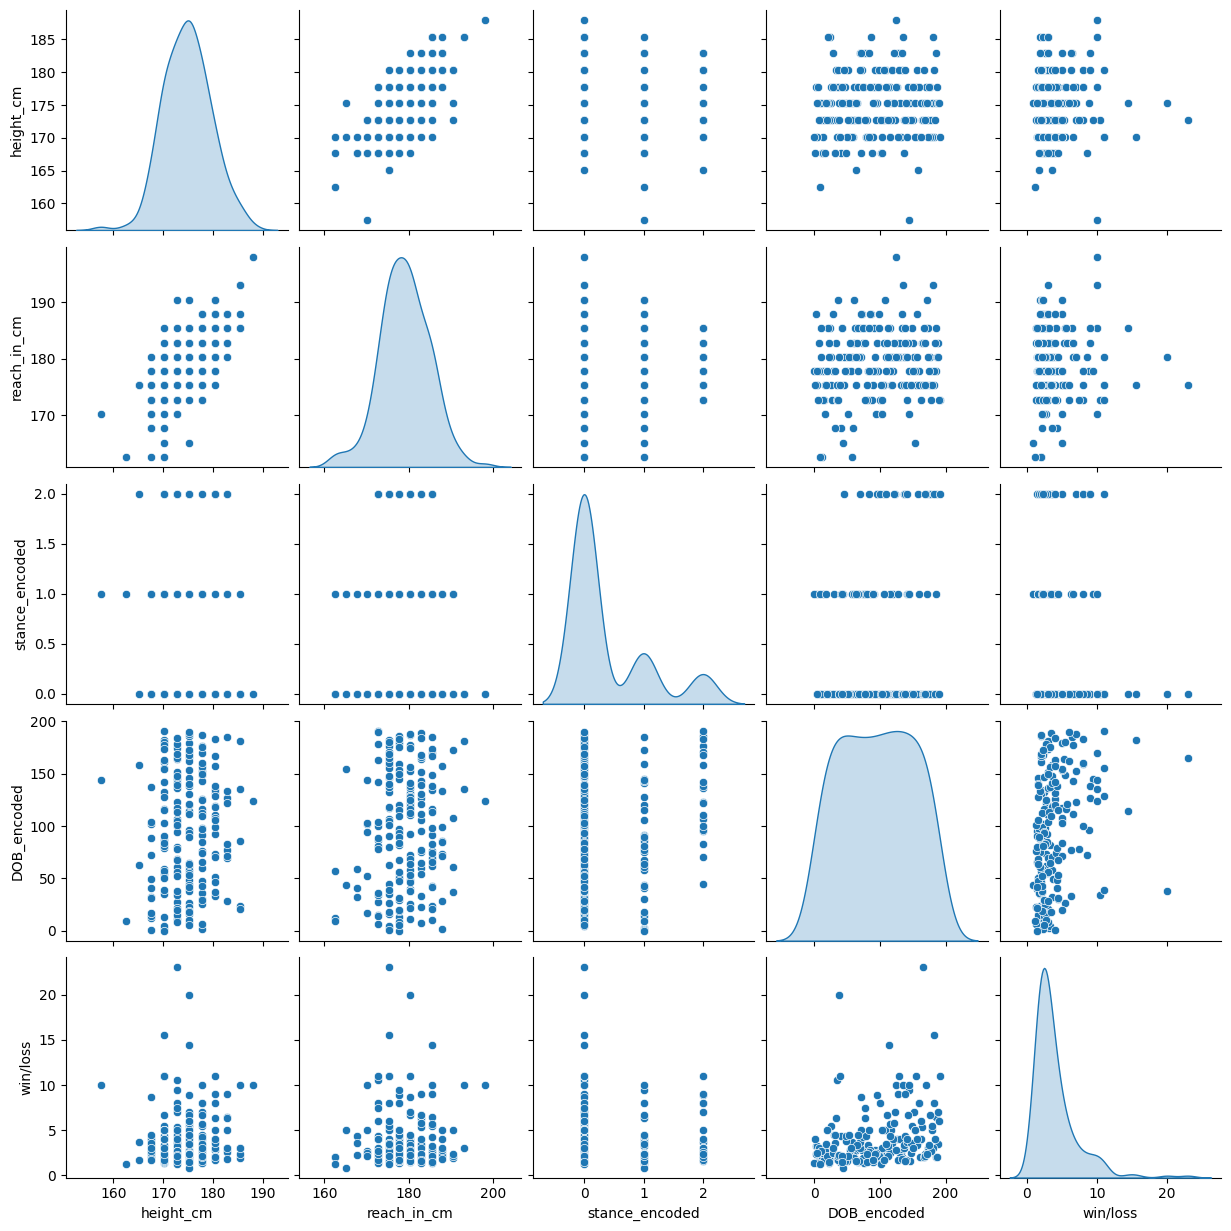

In [2]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

featherweights_numerical = ufc_featherweights.copy()
label_encoder = LabelEncoder()

featherweights_numerical['stance_encoded'] = label_encoder.fit_transform(featherweights_numerical['stance'])
featherweights_numerical['DOB_encoded'] = label_encoder.fit_transform(featherweights_numerical['date_of_birth'])
featherweights_numerical.head() 

campeon = featherweights_numerical.loc[featherweights_numerical['name']=='Ilia Topuria'] 


pairplot_df = featherweights_numerical[['height_cm', 'reach_in_cm', 'stance_encoded', 'DOB_encoded']].copy()
pairplot_df['win/loss'] = win_loss_ratio

sns.pairplot(pairplot_df, diag_kind = 'kde')
plt.show()


In [3]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

X = featherweights_numerical[['height_cm', 'reach_in_cm', 'stance_encoded', 'DOB_encoded']]
y = win_loss_ratio

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state=42)
model1 = LinearRegression()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

r2_value = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('R2 Score: ' f'{r2_value}')
print('MSE: ' f'{mse}')

R2 Score: 0.1400830574766705
MSE: 5.244466873468659


Epoch 1/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 28.4424 - val_loss: 8.2381
Epoch 2/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 25.7117 - val_loss: 5.3713
Epoch 3/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 23.6973 - val_loss: 4.1340
Epoch 4/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 18.7957 - val_loss: 4.3287
Epoch 5/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 17.0708 - val_loss: 5.1680
Epoch 6/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 14.8672 - val_loss: 5.5193
Epoch 7/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 13.7326 - val_loss: 5.9203
Epoch 8/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 13.7535 - val_loss: 5.6792
Epoch 9/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 13.7191 - val_loss: 5.6449
Epoch 10/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 14.2275 - val_loss: 5.8102
Epoch 11/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 13.3396 - val_loss: 5.2131
Epoch 12/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 15.3614 - val_lo

/Users/nikhilsharma/python_envs/clean_venv/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


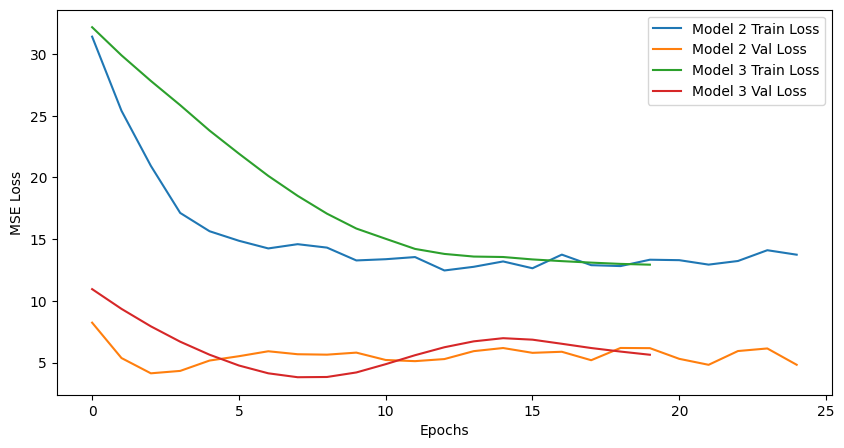

In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Normalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import regularizers

X = featherweights_numerical[['height_cm', 'reach_in_cm', 'stance_encoded', 'DOB_encoded']]
y = win_loss_ratio

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


model_2 = Sequential([
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)  # Linear output for regression
])

model_2.compile(
    loss='mean_squared_error',
    optimizer=RMSprop()
)

history2 = model_2.fit(X_train, y_train, epochs=25, batch_size=64, validation_split=0.2)

mse_model2 = model_2.evaluate(X_test, y_test)
rmse_model2 = np.sqrt(mse_model2)
print(f"Model 2 - MSE: {mse_model2:.4f}, RMSE: {rmse_model2:.4f}")


normalizer = Normalization()
normalizer.adapt(X_train)

model_3 = Sequential([
    normalizer,
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

model_3.compile(
    loss='mean_squared_error',
    optimizer=Adam()
)

history3 = model_3.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

mse_model3 = model_3.evaluate(X_test, y_test)
rmse_model3 = np.sqrt(mse_model3)
print(f"Model 3 - MSE: {mse_model3:.4f}, RMSE: {rmse_model3:.4f}")

campeon_df = pd.DataFrame(campeon)
relevant_stats_topuria = campeon_df[['height_cm', 'reach_in_cm', 'stance_encoded', 'DOB_encoded']]

topuria_array_scaled = scaler.transform(np.array(relevant_stats_topuria))
topuria_pred = model_2.predict(topuria_array_scaled)
print(f"Predicted W/L Ratio (Model 2): {topuria_pred[0][0]:.4f}")

topuria_real_ratio = campeon_df['wins'] / campeon_df['losses']
print(f"Actual W/L Ratio: {topuria_real_ratio.values[0]:.4f}")


plt.figure(figsize=(10,5))
plt.plot(history2.history['loss'], label='Model 2 Train Loss')
plt.plot(history2.history['val_loss'], label='Model 2 Val Loss')
plt.plot(history3.history['loss'], label='Model 3 Train Loss')
plt.plot(history3.history['val_loss'], label='Model 3 Val Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()